In [1]:
from random import *
from time import *
import math
from math import comb
import sys
import matplotlib.pyplot as plt

In [2]:
# pour l'étiquetage

def random_shuffle(sigma):
    n = len(sigma)
    for i in range(1,n):
        j = randint(0,i) # dans l'intervalle $[0..i]$ 
        sigma[i],sigma[j]=sigma[j],sigma[i] # échange les cases d'indices $i$ et $j$

def random_permutation(n):
    sigma = [ i for i in range(1,n+1) ]
    random_shuffle(sigma)
    return sigma

In [13]:
def test_uniformity(gen, nb):
    dico = {}
    for i in range(nb):
        tmp = str(gen())
        if tmp in dico:
            dico[tmp] += 1
        else:
            dico[tmp] = 1
    print("nb:", len(dico))
    for key in dico:
        print(key, "{0:.2f}".format(dico[key] / nb * 100))

def plot_time(gen, mini, maxi, step):
    sizes, timings = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        t1 = time()
        for k in range(nb):
            gen(i)
        timings.append((time() - t1) / nb)
    plt.plot(sizes, timings)
    plt.show()
    
def plot_values(gen, mini, maxi, step):
    sizes, values = [], []
    nb = 100
    for i in range(mini, maxi, step):
        sizes.append(i)        
        v = 0
        for k in range(nb):
            v += gen(i)
        values.append(v / nb)
    plt.plot(sizes,values)
    plt.show()

In [35]:
# T = Z x Set(T) => T = Z x F, tF = tT x F

cayley_max = 700 # on calcule les coefficients re-normalisés... au delà, on a des flottants trop petit
cayley_trees=[0]
cayley_forests=[1]

for i in range(1,cayley_max+1):
    cayley_trees.append(cayley_forests[i-1])
    cayley_forests.append(sum(cayley_forests[i-k] * k * cayley_trees[k]/i for k in range(1,i+1)))

print(cayley_trees[:6])
print(cayley_forests[:6])

[0, 1, 1.0, 1.5, 2.6666666666666665, 5.208333333333333]
[1, 1.0, 1.5, 2.6666666666666665, 5.208333333333333, 10.8]


In [36]:
print(cayley_forests[700])

5.925339312051314e+299


In [37]:
# T = Z x Set(T) => T = Z x F, tF = tT x F

def gen_cayley_tree(n):
    if n == 1:
        return ['z'] # Z
    return ['z']+[t for t in gen_cayley_forest(n-1)]

def uniform_cut(n):
    u = random()
    k = 0
    s = 0
    while u > s:
        k += 1
        s += k * cayley_trees[k] * cayley_forests[n-k] / (n * cayley_forests[n])  # tF = tT x F
    return k

def gen_cayley_forest(n):
    if n == 0:
        return []
    k = uniform_cut(n)
    return [gen_cayley_tree(k)] + gen_cayley_forest(n-k)

def gen_cayley_tree_labelled(n):
    p = random_permutation(n)

    def aux(t):
        if t == ['z']:
            return [p.pop()]
        return [p.pop()] + sorted([aux(tt) for tt in t[1:]])  # tri pour imposer l'ordre d'affichage
    return aux(gen_cayley_tree(n))

In [38]:
print(gen_cayley_tree(20))

['z', ['z', ['z', ['z', ['z', ['z', ['z', ['z']]]], ['z', ['z', ['z']], ['z']]]], ['z', ['z', ['z'], ['z']], ['z', ['z'], ['z']]], ['z']]]


In [33]:
print(gen_cayley_tree_labelled(100))

[61, [12], [54, [35, [26], [85, [21, [22], [60], [63, [49, [14]], [86, [30, [45, [13, [96, [18], [77, [74, [2, [25]], [17], [82, [56, [7]], [88, [57, [79]], [94, [41]]], [92, [23], [36, [16, [65, [32, [3, [40]], [9], [81, [5]]]]]], [66, [80, [20, [29], [69, [52, [4], [98]]]], [31, [10, [33], [68]]], [44, [15, [6, [95]], [39, [47, [42, [91, [72]]]], [83]], [73, [89]]], [50, [59, [1, [53, [43, [11, [90], [97]], [67]]], [55, [19, [38, [37, [71, [8, [34], [46, [87, [27, [78, [48]]]]]], [93, [58, [24]]]]], [64], [99]], [76, [62, [70]]]]]], [84, [28, [51]]]]]]]], [75]]]]], [100]]]]]]]]]]]]


In [34]:
test_uniformity(lambda : gen_cayley_tree_labelled(4),1000000)

nb: 64
[4, [1, [3, [2]]]] 1.56
[1, [3, [2], [4]]] 1.58
[3, [2, [1, [4]]]] 1.55
[3, [4, [2, [1]]]] 1.58
[1, [4, [2], [3]]] 1.56
[2, [4, [3, [1]]]] 1.55
[1, [2], [3], [4]] 1.54
[1, [2, [3]], [4]] 1.55
[2, [1, [3], [4]]] 1.56
[4, [2], [3, [1]]] 1.56
[1, [3, [2]], [4]] 1.57
[1, [3, [2, [4]]]] 1.56
[2, [1, [4]], [3]] 1.58
[4, [1, [2]], [3]] 1.56
[2, [3, [4, [1]]]] 1.56
[2, [1], [3], [4]] 1.56
[1, [3, [4, [2]]]] 1.57
[1, [2, [4]], [3]] 1.56
[1, [4, [2, [3]]]] 1.57
[3, [2], [4, [1]]] 1.55
[3, [1, [4, [2]]]] 1.57
[4, [2, [3, [1]]]] 1.52
[4, [3, [1, [2]]]] 1.57
[2, [3, [1]], [4]] 1.57
[3, [1, [2], [4]]] 1.56
[4, [3, [2, [1]]]] 1.58
[3, [4, [1], [2]]] 1.57
[4, [1, [3]], [2]] 1.57
[4, [1], [2], [3]] 1.55
[2, [1, [3]], [4]] 1.58
[2, [1], [3, [4]]] 1.54
[1, [2, [4, [3]]]] 1.55
[1, [2, [3, [4]]]] 1.55
[1, [3], [4, [2]]] 1.56
[3, [2, [1]], [4]] 1.56
[2, [1, [4, [3]]]] 1.58
[3, [1, [4]], [2]] 1.55
[2, [3, [1], [4]]] 1.55
[2, [3, [1, [4]]]] 1.55
[1, [2], [4, [3]]] 1.56
[4, [1], [3, [2]]] 1.59
[4, [1, [

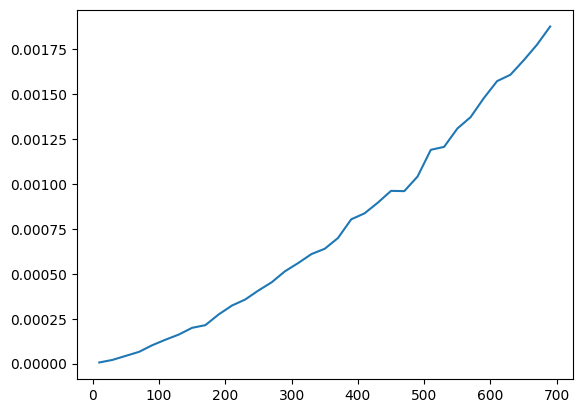

In [10]:
plot_time(gen_cayley_tree, 10, 700, 20)

In [39]:
def profiles(nb, size): # nombre de noeuds moyen à chaque hauteur
    heights = [0]
    def p(t,h):
        if h == len(heights):
            heights.append(1)
        else:
            heights[h]+=1
        if t!=():
            for st in t[1:]:
                p(st,h+1)
    for _ in range(nb):
        t = gen_cayley_tree(size)
        p(t,0)
    return [heights[i]/nb for i in range(len(heights))]

119


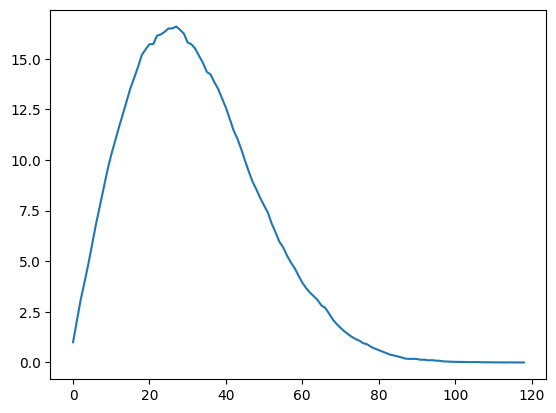

In [40]:
ps = profiles(1000,700)
print(len(ps))
plt.plot(ps)
plt.show()